In [ ]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

np.random.seed(123)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
Data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
Data 

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,...,fBodyBodyAccJerkMag.energy,fBodyBodyAccJerkMag.iqr,fBodyBodyAccJerkMag.entropy,fBodyBodyAccJerkMag.maxInds,fBodyBodyAccJerkMag.meanFreq,fBodyBodyAccJerkMag.skewness,fBodyBodyAccJerkMag.kurtosis,fBodyBodyGyroMag.mean,fBodyBodyGyroMag.std,fBodyBodyGyroMag.mad,fBodyBodyGyroMag.max,fBodyBodyGyroMag.min,fBodyBodyGyroMag.sma,fBodyBodyGyroMag.energy,fBodyBodyGyroMag.iqr,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,-0.9410,-0.566,-0.817,0.851,0.674,0.834,-0.987,-1.000,-1.000,-1.000,-0.997,-0.972,-0.983,-0.637,-0.5150,-0.5370,0.360,-0.23300,0.2260,0.0695,0.0643,-0.07640,0.138,-0.0368,0.231,-0.1150,0.3190,-0.48800,-0.0959,...,-1.000,-0.991,-1.000,-0.905,0.2900,-0.6690,-0.933,-0.988,-0.985,-0.984,-0.985,-0.995,-0.988,-1.000,-0.989,-0.736,-1.000,-0.2570,-0.32200,-0.6580,-0.996,-0.995,-0.994,-0.994,-0.997,-0.996,-1.000,-0.994,-0.956,-1.000,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,-0.9400,-0.555,-0.816,0.845,0.685,0.838,-0.988,-1.000,-1.000,-1.000,-0.996,-0.980,-0.983,-0.629,-0.3970,-0.4240,0.346,-0.17400,0.1780,0.1690,-0.0202,0.13600,-0.114,0.2430,0.301,-0.0764,0.0820,0.15300,0.0085,...,-1.000,-0.984,-1.000,-1.000,0.5020,-0.5170,-0.786,-0.983,-0.981,-0.982,-0.979,-0.987,-0.983,-1.000,-0.981,-0.641,-1.000,-0.0472,0.00787,-0.2840,-0.991,-0.989,-0.991,-0.987,-0.980,-0.991,-1.000,-0.992,-0.923,-1.000,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,-0.9430,-0.569,-0.823,0.852,0.693,0.846,-0.997,-1.000,-1.000,-1.000,-0.998,-0.993,-0.990,-0.888,-0.5540,-0.5510,0.412,-0.12800,0.2650,0.0677,0.2890,-0.24100,0.315,-0.1520,0.181,0.0504,-0.0398,-0.00999,0.0436,...,-1.000,-0.994,-1.000,-0.905,0.5300,-0.6060,-0.869,-0.999,-0.998,-0.998,-0.999,-0.998,-0.999,-1.000,-0.996,-1.000,-0.949,0.3250,-0.75900,-0.9420,-0.999,-0.999,-0.999,-0.999,-0.995,-0.999,-1.000,-0.999,-1.000,-0.968,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,-0.9260,-0.448,-0.731,0.849,0.681,0.838,-0.904,-1.000,-0.989,-0.991,-0.989,-0.770,-0.869,-0.163,0.0546,0.0730,0.158,-0.16000,0.1900,-0.3220,-0.3150,0.27900,-0.307,0.3430,-0.083,0.0273,-0.0465,-0.08650,0.8220,...,-1.000,-0.984,-1.000,-1.000,0.1690,-0.5220,-0.818,-0.911,-0.884,-0.898,-0.880,-0.847,-0.911,-0.993,-0.956,-0.387,-1.000,-0.1730,0.07620,-0.3040,-0.990,-0.989,-0.990,-0.987,-0.999,-0.990,-1.000,-0.992,-0.923,-1.000,0.1310,0.2080,-0.0681,

In [ ]:
Data.sample(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,...,fBodyBodyAccJerkMag.energy,fBodyBodyAccJerkMag.iqr,fBodyBodyAccJerkMag.entropy,fBodyBodyAccJerkMag.maxInds,fBodyBodyAccJerkMag.meanFreq,fBodyBodyAccJerkMag.skewness,fBodyBodyAccJerkMag.kurtosis,fBodyBodyGyroMag.mean,fBodyBodyGyroMag.std,fBodyBodyGyroMag.mad,fBodyBodyGyroMag.max,fBodyBodyGyroMag.min,fBodyBodyGyroMag.sma,fBodyBodyGyroMag.energy,fBodyBodyGyroMag.iqr,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
613,1739,WALKING_UPSTAIRS,0.241,-0.00873,-0.1060,-0.216,0.3220,-0.0801,-0.267,0.315,-0.124,-0.144,0.239,-0.108,-0.00806,-0.0447,0.466,0.0204,-0.691,-0.664,-0.620,-0.351,-0.0239,-0.472,0.463,0.376,-0.152,-0.3340,0.25900,-0.1090,0.0766,-0.1920,0.1430,0.00736,0.185,-0.1450,0.0809,-0.0649,0.0856,-0.324,...,-0.781,-0.423,0.232,-0.841,0.4660,-0.820,-0.973,-0.2690,-0.284,-0.189,-0.460,-0.796,-0.2690,-0.676,-0.347,0.5720,-0.795,-0.138,-0.514,-0.832,-0.529,-0.677,-0.578,-0.782,-0.905,-0.529,-0.909,-0.458,0.461,-0.651,0.358,-0.726,-0.9410,0.86900,0.337,-0.916,0.7750,-0.686,0.314,0.034
2306,6598,WALKING_DOWNSTAIRS,0.238,-0.03990,-0.1580,0.284,0.2270,-0.1330,0.245,0.214,-0.169,0.623,0.258,-0.401,-0.08310,0.0248,0.132,0.2640,-0.176,-0.709,-0.658,0.201,-0.0497,-0.203,0.345,0.234,0.245,-0.2170,0.05410,-0.0314,0.3450,0.0475,-0.0105,0.14400,0.127,0.0450,0.1570,-0.1820,0.1010,-0.512,...,-0.497,-0.197,0.532,-0.873,0.1590,-0.205,-0.553,-0.0911,-0.279,-0.134,-0.470,-0.570,-0.0911,-0.601,-0.156,0.7530,-0.846,0.170,-0.587,-0.866,-0.260,-0.350,-0.324,-0.428,-0.747,-0.260,-0.736,-0.370,0.545,-0.873,0.302,-0.190,-0.5850,0.09500,-0.684,0.937,-0.6360,-0.749,0.235,0.127
800,2291,LAYING,0.280,-0.02310,-0.0998,-0.978,-0.9650,-0.9690,-0.980,-0.964,-0.970,-0.929,-0.561,-0.797,0.82400,0.6800,0.836,-0.9700,-1.000,-1.000,-0.999,-0.981,-0.9650,-0.970,-0.276,-0.581,-0.274,-0.1830,-0.00832,0.1180,0.0359,0.0469,-0.0692,-0.06490,0.389,0.1360,-0.1440,0.2060,-0.1540,0.479,...,-1.000,-0.990,-1.000,-0.143,0.4880,-0.604,-0.903,-0.9780,-0.957,-0.967,-0.947,-0.997,-0.9780,-0.999,-0.982,-0.6370,-1.000,-0.474,0.537,0.360,-0.992,-0.996,-0.994,-0.997,-0.988,-0.992,-1.000,-0.992,-1.000,-0.683,0.494,-0.863,-0.9560,-0.12800,0.262,-0.098,0.0558,0.420,-0.278,-0.714
1621,4615,LAYING,0.320,0.03790,-0.1530,-0.642,-0.5340,-0.7920,-0.647,-0.615,-0.788,-0.526,-0.160,-0.696,0.58800,0.4050,0.689,-0.6140,-0.934,-0.952,-0.975,-0.683,-0.7880,-0.791,0.385,0.410,-0.232,-0.0884,0.13000,-0.3640,0.2470,-0.0692,0.0456,0.01410,0.121,0.0129,-0.0357,0.3130,-0.4300,0.454,...,-0.972,-0.801,-0.195,-0.968,-0.0905,-0.232,-0.649,-0.7800,-0.648,-0.692,-0.697,-0.975,-0.7800,-0.941,-0.831,0.0962,-0.897,-0.558,-0.102,-0.549,-0.886,-0.910,-0.899,-0.920,-0.912,-0.886,-0.994,-0.896,-0.242,-0.968,0.309,-0.388,-0.7290,0.008

In [ ]:
Data.shape

(3609, 563)

In [ ]:
Labels = Data['activity']
Labels

0                 STANDING
1                 STANDING
2                 STANDING
3                 STANDING
4                 STANDING
               ...        
3604      WALKING_UPSTAIRS
3605      WALKING_UPSTAIRS
3606      WALKING_UPSTAIRS
3607      WALKING_UPSTAIRS
3608    WALKING_DOWNSTAIRS
Name: activity, Length: 3609, dtype: object

In [ ]:
Data = Data.drop(['rn', 'activity'], axis = 1)

In [ ]:
Labels_keys = Labels.unique().tolist()
Labels_keys

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

In [ ]:
Labels = np.array(Labels)
Labels

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'], dtype=object)

In [ ]:
Temp = pd.DataFrame(Data.isnull().sum())
display(Temp)

,0
tBodyAcc.mean.X,0
tBodyAcc.mean.Y,0
tBodyAcc.mean.Z,0
tBodyAcc.std.X,0
tBodyAcc.std.Y,0
...,...
angle.tBodyGyroMean.gravityMean,0
angle.tBodyGyroJerkMean.gravityMean,0
angle.X.gravityMean,0
angle.Y.gravityMean,0


In [ ]:
Temp.columns = ['Sum']

In [ ]:
Temp

,Sum
tBodyAcc.mean.X,0
tBodyAcc.mean.Y,0
tBodyAcc.mean.Z,0
tBodyAcc.std.X,0
tBodyAcc.std.Y,0
...,...
angle.tBodyGyroMean.gravityMean,0
angle.tBodyGyroJerkMean.gravityMean,0
angle.X.gravityMean,0
angle.Y.gravityMean,0


In [ ]:
len((Temp.index[Temp['Sum'] > 0])) 

0

In [ ]:
scaler = StandardScaler()
Data = scaler.fit_transform(Data)

In [ ]:
ks = range(1, 20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

In [ ]:
inertias

[2024649.0000000002,
 1156484.008987799,
 1027054.394433169,
 975184.0006189472,
 924560.3771935481,
 896009.4174356429,
 874844.0948345494,
 858398.0631426648,
 842018.0427832877,
 827056.9387314866,
 815245.5135948503,
 800921.7175799496,
 792254.4174777409,
 783276.828543708,
 780147.6076070579,
 768292.7873520255,
 762910.5882054142,
 755420.0086545936,
 748815.2534059702]

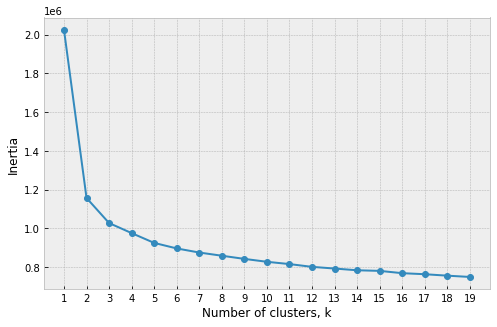

In [ ]:
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [ ]:
def k_means(n_clust, data_frame, true_labels):

  k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
  k_means.fit(data_frame)
  c_labels = k_means.labels_
  df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
  ct = pd.crosstab(df['clust_label'], df['orig_label'])
  y_clust = k_means.predict(data_frame)
  display(ct)
  print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
  print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

In [ ]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,1,1,0,603,493,535
1,680,622,668,0,0,6


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.378   0.981   0.546   0.329   0.546    0.390


In [ ]:
k_means(n_clust=6, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,554,24,0,0,0,0
1,0,0,0,248,311,97
2,1,0,0,329,107,438
3,106,157,188,0,0,2
4,0,0,0,26,75,4
5,20,442,480,0,0,0


inertia  homo    compl   v-meas   ARI     AMI     silhouette
895968   0.547   0.588   0.566   0.429   0.566    0.112


In [ ]:
Labels_binary = Labels.copy()
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'):
        Labels_binary[i] = 0
    else:
        Labels_binary[i] = 1
Labels_binary = np.array(Labels_binary.astype(int))

In [ ]:
Labels_binary

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels_binary)

orig_label,0,1
clust_label,,
0,2,1631
1,1970,6


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.977   0.978   0.978   0.991   0.978    0.390


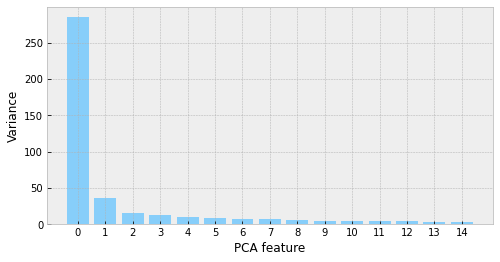

In [ ]:
pca = PCA(random_state=123)
pca.fit(Data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [ ]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(Data)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [ ]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 1)


orig_label,0,1
clust_label,,
0,1,1629
1,1971,8


inertia  homo    compl   v-meas   ARI     AMI     silhouette
168716   0.976   0.976   0.976   0.990   0.976    0.794


In [ ]:
pca_transform(n_comp=2)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 2)


orig_label,0,1
clust_label,,
0,3,1631
1,1969,6


inertia  homo    compl   v-meas   ARI     AMI     silhouette
295753   0.975   0.975   0.975   0.990   0.975    0.694
